In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = pd.read_csv("metacritic_clean.csv")
df2 = pd.read_csv("vgsales_clean.csv")

# (1) Which publishers have had the highest sales in the last ten years?
result = df2.groupby("Publisher")["Global_Sales"].sum().reset_index()
top_publisher = result.loc[result["Global_Sales"].idxmax()]
print(top_publisher)





Publisher       Nintendo
Global_Sales     1786.56
Name: 359, dtype: object


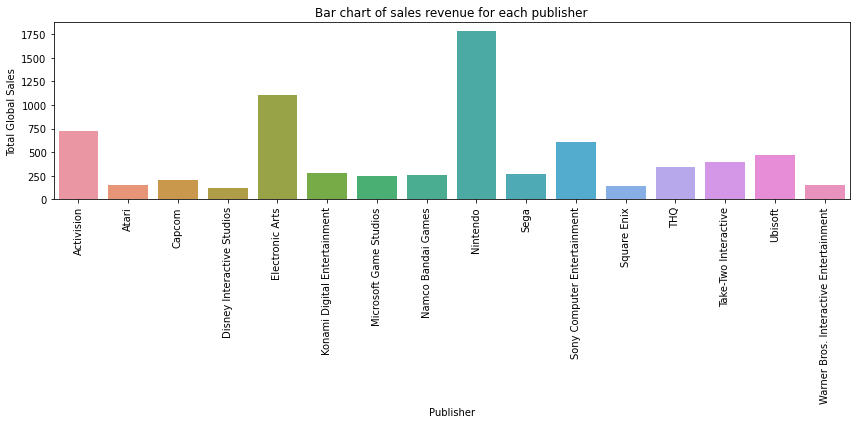

In [6]:
# Filter publishers with total global sales >= 100
filtered_result = result[result["Global_Sales"] >= 100]

# Plot bar chart of sales revenue for each publisher
plt.figure(figsize=(12, 6))
sns.barplot(x="Publisher", y="Global_Sales", data=filtered_result)
plt.title("Bar chart of sales revenue for each publisher")
plt.xlabel("Publisher")
plt.ylabel("Total Global Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [7]:
# (2) Is there a strong correlation between a game's review score and its sales?
# Merge datasets and clean data
merged_df = pd.merge(df, df2, on="Game_Title", how="inner")
cleaned_merged_df = merged_df.dropna()
cleaned_unique_merged_df = cleaned_merged_df.drop_duplicates(subset="Game_Title")
cleaned_unique_merged_df = cleaned_unique_merged_df[cleaned_unique_merged_df["Global_Sales"] <= 40]

# Calculate correlation
correlation = cleaned_unique_merged_df["Global_Sales"].corr(cleaned_unique_merged_df["Meta_Score"])
print("Correlation between Global Sales and Meta Score:", correlation)
cor_test_result = cleaned_unique_merged_df[["Global_Sales", "Meta_Score"]].corr(method='pearson')
print(cor_test_result)



Correlation between Global Sales and Meta Score: 0.26245603402297146
              Global_Sales  Meta_Score
Global_Sales      1.000000    0.262456
Meta_Score        0.262456    1.000000


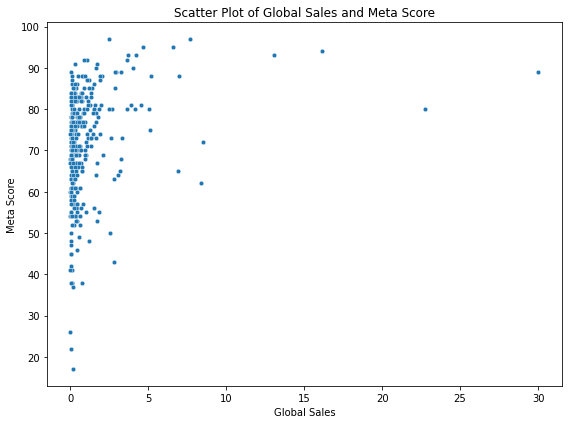

In [8]:
# Scatter plot of Global Sales vs Meta Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Global_Sales", y="Meta_Score", data=cleaned_unique_merged_df, s=20)
plt.title("Scatter Plot of Global Sales and Meta Score")
plt.xlabel("Global Sales")
plt.ylabel("Meta Score")
plt.tight_layout()
plt.show()



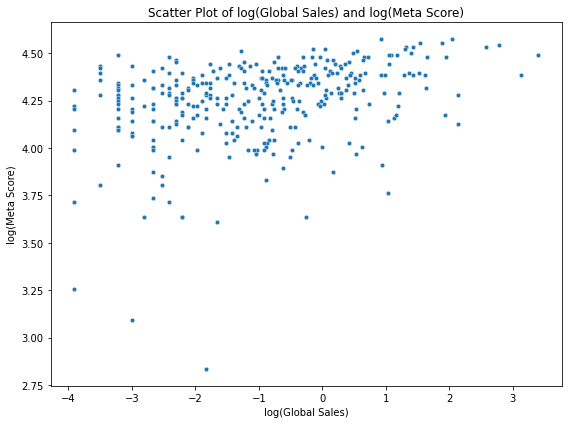

In [9]:
# (3) Log-log scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log(cleaned_unique_merged_df["Global_Sales"]),
                y=np.log(cleaned_unique_merged_df["Meta_Score"]),
                s=20)
plt.title("Scatter Plot of log(Global Sales) and log(Meta Score)")
plt.xlabel("log(Global Sales)")
plt.ylabel("log(Meta Score)")
plt.tight_layout()
plt.show()



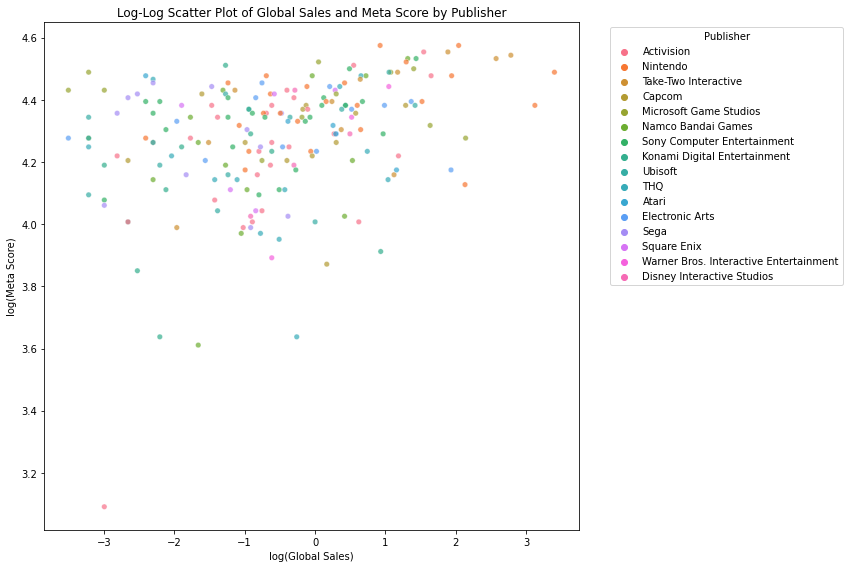

In [10]:
# Filter data for publishers in the result dataset
filtered_publishers = filtered_result["Publisher"].unique()
filtered_data = cleaned_unique_merged_df[cleaned_unique_merged_df["Publisher"].isin(filtered_publishers)]

# Log-log scatter plot with publishers
plt.figure(figsize=(12, 8))
sns.scatterplot(x=np.log(filtered_data["Global_Sales"]),
                y=np.log(filtered_data["Meta_Score"]),
                hue=filtered_data["Publisher"], alpha=0.7, s=30)
plt.title("Log-Log Scatter Plot of Global Sales and Meta Score by Publisher")
plt.xlabel("log(Global Sales)")
plt.ylabel("log(Meta Score)")
plt.legend(title="Publisher", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



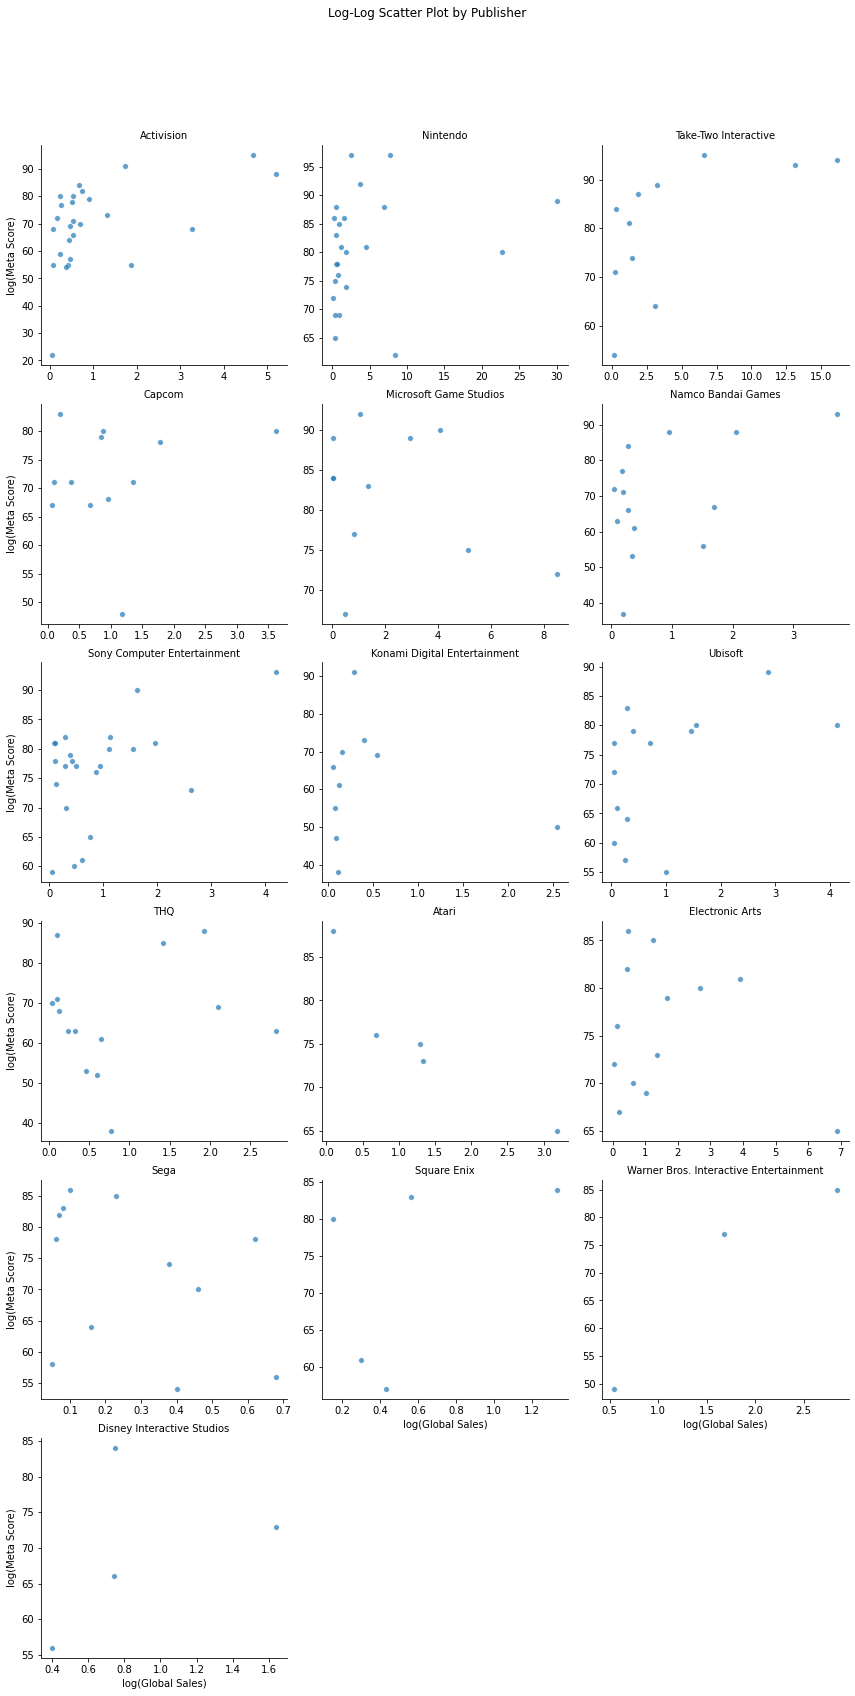

In [11]:
# Facet plot by publisher
g = sns.FacetGrid(filtered_data, col="Publisher", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, "Global_Sales", "Meta_Score", alpha=0.7, s=30)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("log(Global Sales)", "log(Meta Score)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Log-Log Scatter Plot by Publisher")
plt.show()